# Read / EDA / Clean / Exploratory Visualizations

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Read / Explore / Clean

In [2]:
train = pd.read_csv('../Data/train.csv')
train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [3]:
train.shape

(2051, 81)

In [4]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [5]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
train.columns = train.columns.str.lower().str.replace(' ','_')
train.head(0)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [7]:
train_col_names = train.columns.to_list()
train_col_names

['id',
 'pid',
 'ms_subclass',
 'ms_zoning',
 'lot_frontage',
 'lot_area',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'mas_vnr_area',
 'exter_qual',
 'exter_cond',
 'foundation',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 'bsmt_unf_sf',
 'total_bsmt_sf',
 'heating',
 'heating_qc',
 'central_air',
 'electrical',
 '1st_flr_sf',
 '2nd_flr_sf',
 'low_qual_fin_sf',
 'gr_liv_area',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_cars',
 'garage_are

### Decided to split the data into section to make it visually easier to clean. Although it may take longer I believe I can look at each column more precise and see if I want to use it for my model. I will deal with the missing values in each subset and change the main training set as I go. Will also explore outliers, data types, change value type if needed, and possible columns which I will use in modeling later.

##### Train_1

In [8]:
train_1 = train.iloc[:,0:15]
train_1.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm


In [9]:
train_1.shape

(2051, 15)

In [10]:
train_1.dtypes

id                int64
pid               int64
ms_subclass       int64
ms_zoning        object
lot_frontage    float64
lot_area          int64
street           object
alley            object
lot_shape        object
land_contour     object
utilities        object
lot_config       object
land_slope       object
neighborhood     object
condition_1      object
dtype: object

In [11]:
train_1.describe(include ='all')

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1
count,2051.000000,2.051000e+03,2051.000000,2051,1721.000000,2051.000000,2051,140,2051,2051,2051,2051,2051,2051,2051
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,3,5,3,28,9
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm
freq,NaN,NaN,NaN,1598,NaN,NaN,2044,85,1295,1843,2049,1503,1953,310,1767
mean,1474.033642,7.135900e+08,57.008776,NaN,69.055200,10065.208191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,843.980841,1.886918e+08,42.824223,NaN,23.260653,6742.488909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,753.500000,5.284581e+08,20.000000,NaN,58.000000,7500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1486.000000,5.354532e+08,50.000000,NaN,68.000000,9430.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2198.000000,9.071801e+08,70.000000,NaN,80.000000,11513.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_1.isna().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage     330
lot_area           0
street             0
alley           1911
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
dtype: int64

In [13]:
train['lot_frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [14]:
train[['lot_frontage', 'alley']] = train[['lot_frontage', 'alley']].fillna(0)

In [15]:
train[['lot_frontage', 'alley']].isna().sum()

lot_frontage    0
alley           0
dtype: int64

In [16]:
train['street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [17]:
# make 'street' a binary value
train['street'] = train['street'].replace({'Pave':0, 'Grvl':1})
train['street'].head()

0    0
1    0
2    0
3    0
4    0
Name: street, dtype: int64

##### Train_2

In [18]:
train_2 = train.iloc[:,15:30]
train_2.head()

,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond
0,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA
1,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA
2,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd
3,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA
4,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA


In [19]:
train_2.shape

(2051, 15)

In [20]:
train_2.dtypes

condition_2        object
bldg_type          object
house_style        object
overall_qual        int64
overall_cond        int64
year_built          int64
year_remod/add      int64
roof_style         object
roof_matl          object
exterior_1st       object
exterior_2nd       object
mas_vnr_type       object
mas_vnr_area      float64
exter_qual         object
exter_cond         object
dtype: object

In [21]:
train_2.describe(include='all')

,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond
count,2051,2051,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051,2051,2051,2029,2029.000000,2051,2051
unique,8,5,8,NaN,NaN,NaN,NaN,6,6,15,15,4,NaN,4,5
top,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA
freq,2025,1700,1059,NaN,NaN,NaN,NaN,1619,2025,724,721,1218,NaN,1247,1778
mean,NaN,NaN,NaN,6.112140,5.562165,1971.708922,1984.190151,NaN,NaN,NaN,NaN,NaN,99.695909,NaN,NaN
std,NaN,NaN,NaN,1.426271,1.104497,30.177889,21.036250,NaN,NaN,NaN,NaN,NaN,174.963129,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,5.000000,5.000000,1953.500000,1964.500000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,6.000000,5.000000,1974.000000,1993.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,NaN,7.000000,6.000000,2001.000000,2004.000000,NaN,NaN,NaN,NaN,NaN,161.000000,NaN,NaN


In [22]:
train_2.isna().sum()

condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type      22
mas_vnr_area      22
exter_qual         0
exter_cond         0
dtype: int64

In [23]:
train['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [24]:
train['mas_vnr_area'].unique()

array([2.890e+02, 1.320e+02, 0.000e+00, 8.200e+01, 1.800e+02, 1.920e+02,
       2.320e+02, 4.560e+02, 1.480e+02,       nan, 3.000e+00, 3.360e+02,
       4.800e+02, 3.200e+02, 1.040e+02, 3.350e+02, 4.000e+01, 1.100e+02,
       1.060e+02, 5.130e+02, 1.840e+02, 5.220e+02, 1.430e+02, 3.480e+02,
       1.170e+02, 5.100e+02, 1.450e+02, 9.600e+01, 6.680e+02, 5.000e+01,
       2.280e+02, 6.500e+01, 3.610e+02, 7.480e+02, 1.970e+02, 5.720e+02,
       1.280e+02, 1.200e+02, 2.540e+02, 8.600e+01, 3.000e+01, 5.400e+01,
       2.460e+02, 3.970e+02, 2.960e+02, 1.440e+02, 9.020e+02, 2.610e+02,
       2.600e+02, 2.750e+02, 5.700e+01, 1.050e+03, 3.590e+02, 1.080e+02,
       6.620e+02, 5.000e+02, 2.100e+02, 1.650e+02, 2.080e+02, 3.600e+02,
       1.600e+02, 6.400e+01, 2.240e+02, 2.060e+02, 1.160e+02, 6.510e+02,
       5.040e+02, 2.520e+02, 3.370e+02, 8.400e+01, 3.090e+02, 4.660e+02,
       6.000e+02, 1.890e+02, 3.680e+02, 1.980e+02, 1.400e+02, 9.220e+02,
       1.600e+01, 1.800e+01, 9.000e+01, 4.250e+02, 

In [25]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

In [26]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

In [27]:
train[['mas_vnr_area', 'mas_vnr_type']].isna().sum()

mas_vnr_area    0
mas_vnr_type    0
dtype: int64

##### Train_3

In [28]:
train_3=train.iloc[:,30:45]
train_3.head()

,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf
0,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725
1,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913
2,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057
3,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744
4,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831


In [29]:
train_3.shape

(2051, 15)

In [30]:
train_3.dtypes

foundation         object
bsmt_qual          object
bsmt_cond          object
bsmt_exposure      object
bsmtfin_type_1     object
bsmtfin_sf_1      float64
bsmtfin_type_2     object
bsmtfin_sf_2      float64
bsmt_unf_sf       float64
total_bsmt_sf     float64
heating            object
heating_qc         object
central_air        object
electrical         object
1st_flr_sf          int64
dtype: object

In [31]:
train_3.describe(include = 'all')

,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf
count,2051,1996,1996,1993,1996,2050.000000,1995,2050.000000,2050.000000,2050.000000,2051,2051,2051,2051,2051.000000
unique,6,5,5,4,6,NaN,6,NaN,NaN,NaN,5,5,2,5,NaN
top,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN
freq,926,887,1834,1339,615,NaN,1749,NaN,NaN,NaN,2018,1065,1910,1868,NaN
mean,NaN,NaN,NaN,NaN,NaN,442.300488,NaN,47.959024,567.728293,1057.987805,NaN,NaN,NaN,NaN,1164.488055
std,NaN,NaN,NaN,NaN,NaN,461.204124,NaN,165.000901,444.954786,449.410704,NaN,NaN,NaN,NaN,396.446923
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,220.000000,793.000000,NaN,NaN,NaN,NaN,879.500000
50%,NaN,NaN,NaN,NaN,NaN,368.000000,NaN,0.000000,474.500000,994.500000,NaN,NaN,NaN,NaN,1093.000000
75%,NaN,NaN,NaN,NaN,NaN,733.750000,NaN,0.000000,811.000000,1318.750000,NaN,NaN,NaN,NaN,1405.000000


In [32]:
train_3.isna().sum()

foundation         0
bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
dtype: int64

In [33]:
train['electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [34]:
train['bsmt_qual'].fillna('None', inplace=True)
train['bsmt_cond'].fillna('None', inplace=True)
train['bsmt_exposure'].fillna('None', inplace=True)
train['bsmtfin_type_1'].fillna('None', inplace=True)
train['bsmtfin_sf_1'].fillna('None', inplace=True)
train['bsmtfin_type_2'].fillna('None', inplace=True)
train['bsmtfin_sf_2'].fillna('None', inplace=True)
train['bsmt_unf_sf'].fillna('None', inplace=True)
train['total_bsmt_sf'].fillna(0, inplace=True)

In [35]:
train[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2',
       'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']].isna().sum()

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
dtype: int64

In [36]:
train['central_air'].unique()

array(['Y', 'N'], dtype=object)

In [37]:
# make "central_air" binary values
train['central_air'] = train['central_air'].replace({'Y':1 , 'N':0})
train['central_air'].head()

0    1
1    1
2    1
3    1
4    1
Name: central_air, dtype: int64

##### Train_4

In [38]:
train_4 =train.iloc[:,45:60]
train_4.head()

,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type
0,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd
1,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd
2,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd
3,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn
4,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd


In [39]:
train_4.shape

(2051, 15)

In [40]:
train_4.dtypes

2nd_flr_sf           int64
low_qual_fin_sf      int64
gr_liv_area          int64
bsmt_full_bath     float64
bsmt_half_bath     float64
full_bath            int64
half_bath            int64
bedroom_abvgr        int64
kitchen_abvgr        int64
kitchen_qual        object
totrms_abvgrd        int64
functional          object
fireplaces           int64
fireplace_qu        object
garage_type         object
dtype: object

In [41]:
train_4.describe(include='all')

,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type
count,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051,2051.000000,2051,2051.000000,1051,1938
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,8,NaN,5,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1047,NaN,1915,NaN,523,1213
mean,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,NaN,6.435885,NaN,0.590931,NaN,NaN
std,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,NaN,1.560225,NaN,0.638516,NaN,NaN
min,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN
25%,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,NaN,5.000000,NaN,0.000000,NaN,NaN
50%,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,NaN,6.000000,NaN,1.000000,NaN,NaN
75%,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,NaN,7.000000,NaN,1.000000,NaN,NaN


In [42]:
train_4.isna().sum()

2nd_flr_sf            0
low_qual_fin_sf       0
gr_liv_area           0
bsmt_full_bath        2
bsmt_half_bath        2
full_bath             0
half_bath             0
bedroom_abvgr         0
kitchen_abvgr         0
kitchen_qual          0
totrms_abvgrd         0
functional            0
fireplaces            0
fireplace_qu       1000
garage_type         113
dtype: int64

In [43]:
train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [44]:
train['bsmt_full_bath'].fillna(0,inplace=True)
train['bsmt_half_bath'].fillna(0,inplace=True)
train['fireplace_qu'].fillna('None', inplace=True)
train['garage_type'].fillna('None', inplace=True)

In [45]:
train[['bsmt_full_bath','bsmt_half_bath','fireplace_qu','garage_type']].isna().sum()

bsmt_full_bath    0
bsmt_half_bath    0
fireplace_qu      0
garage_type       0
dtype: int64

##### Train_5

In [46]:
train_5 = train.iloc[:,60:75]
train_5.head()

,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence
0,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN
1,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN
2,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN
3,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN
4,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN


In [47]:
train_5.shape

(2051, 15)

In [48]:
train_5.dtypes

garage_yr_blt     float64
garage_finish      object
garage_cars       float64
garage_area       float64
garage_qual        object
garage_cond        object
paved_drive        object
wood_deck_sf        int64
open_porch_sf       int64
enclosed_porch      int64
3ssn_porch          int64
screen_porch        int64
pool_area           int64
pool_qc            object
fence              object
dtype: object

In [49]:
train_5.describe(include = 'all')

,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence
count,1937.000000,1937,2050.000000,2050.000000,1937,1937,2051,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,9,400
unique,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,4,4
top,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv
freq,NaN,849,NaN,NaN,1832,1868,1861,NaN,NaN,NaN,NaN,NaN,NaN,4,227
mean,1978.707796,NaN,1.776585,473.671707,NaN,NaN,NaN,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,NaN,NaN
std,25.441094,NaN,0.764537,215.934561,NaN,NaN,NaN,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,NaN,NaN
min,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1961.000000,NaN,1.000000,319.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1980.000000,NaN,2.000000,480.000000,NaN,NaN,NaN,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,2002.000000,NaN,2.000000,576.000000,NaN,NaN,NaN,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


In [50]:
train_5.isna().sum()

garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
paved_drive          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
pool_qc           2042
fence             1651
dtype: int64

In [51]:
train['garage_yr_blt'].fillna(1978, inplace=True)
train['garage_finish'].fillna('None', inplace=True)
train['garage_cars'].fillna(0, inplace=True)
train['garage_area'].fillna(0, inplace=True)
train['garage_qual'].fillna('None', inplace=True)
train['garage_cond'].fillna('None', inplace=True)
train['pool_qc'].fillna('None', inplace=True)
train['fence'].fillna('None', inplace=True)

In [52]:
train[['garage_yr_blt', 'garage_finish', 'garage_cars', 'garage_area', 'garage_qual', 'garage_cond',
       'pool_qc', 'fence']].isna().sum()

garage_yr_blt    0
garage_finish    0
garage_cars      0
garage_area      0
garage_qual      0
garage_cond      0
pool_qc          0
fence            0
dtype: int64

In [53]:
train['garage_yr_blt'] = train['garage_yr_blt'].replace(2207, 1978)

##### Train_6

In [54]:
train_6 = train.iloc[:,75:81]
train_6.head()

,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,NaN,0,3,2010,WD,130500
1,NaN,0,4,2009,WD,220000
2,NaN,0,1,2010,WD,109000
3,NaN,0,4,2010,WD,174000
4,NaN,0,3,2010,WD,138500


In [55]:
train_6.dtypes

misc_feature    object
misc_val         int64
mo_sold          int64
yr_sold          int64
sale_type       object
saleprice        int64
dtype: object

In [56]:
train_6.describe(include='all')

,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
count,65,2051.000000,2051.000000,2051.000000,2051,2051.000000
unique,5,NaN,NaN,NaN,9,NaN
top,Shed,NaN,NaN,NaN,WD,NaN
freq,56,NaN,NaN,NaN,1781,NaN
mean,NaN,51.574354,6.219893,2007.775719,NaN,181469.701609
std,NaN,573.393985,2.744736,1.312014,NaN,79258.659352
min,NaN,0.000000,1.000000,2006.000000,NaN,12789.000000
25%,NaN,0.000000,4.000000,2007.000000,NaN,129825.000000
50%,NaN,0.000000,6.000000,2008.000000,NaN,162500.000000
75%,NaN,0.000000,8.000000,2009.000000,NaN,214000.000000


In [57]:
train_6.isna().sum()

misc_feature    1986
misc_val           0
mo_sold            0
yr_sold            0
sale_type          0
saleprice          0
dtype: int64

In [58]:
train['misc_feature'].fillna('None', inplace=True)

In [59]:
train['misc_feature'].isna().sum()

0

In [60]:
train.isna().sum()

id              0
pid             0
ms_subclass     0
ms_zoning       0
lot_frontage    0
               ..
misc_val        0
mo_sold         0
yr_sold         0
sale_type       0
saleprice       0
Length: 81, dtype: int64

In [61]:
train.to_csv('../Data/train_clean.csv', index=False)

# EDA / VIZ

In [62]:
train_clean = pd.read_csv('../Data/train_clean.csv')
train_clean.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,0,0,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,0,0,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,0,0,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,0,0,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,0,0,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500


In [63]:
train_clean.columns[train_clean.isna().mean() > 1]

Index([], dtype='object')

In [64]:
train.shape

(2051, 81)

In [65]:
# Produce heat maps to see relative correlation of variables
# Bar graphs for object columns to explore correlations

In [66]:
train_noid = train_clean.drop(columns = ['id'])

/var/folders/5t/bq10hvbn0zncjrr_1ppk5kp40000gn/T/ipykernel_53379/3184719338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_noid.corr(), cmap = 'mako', annot=True);


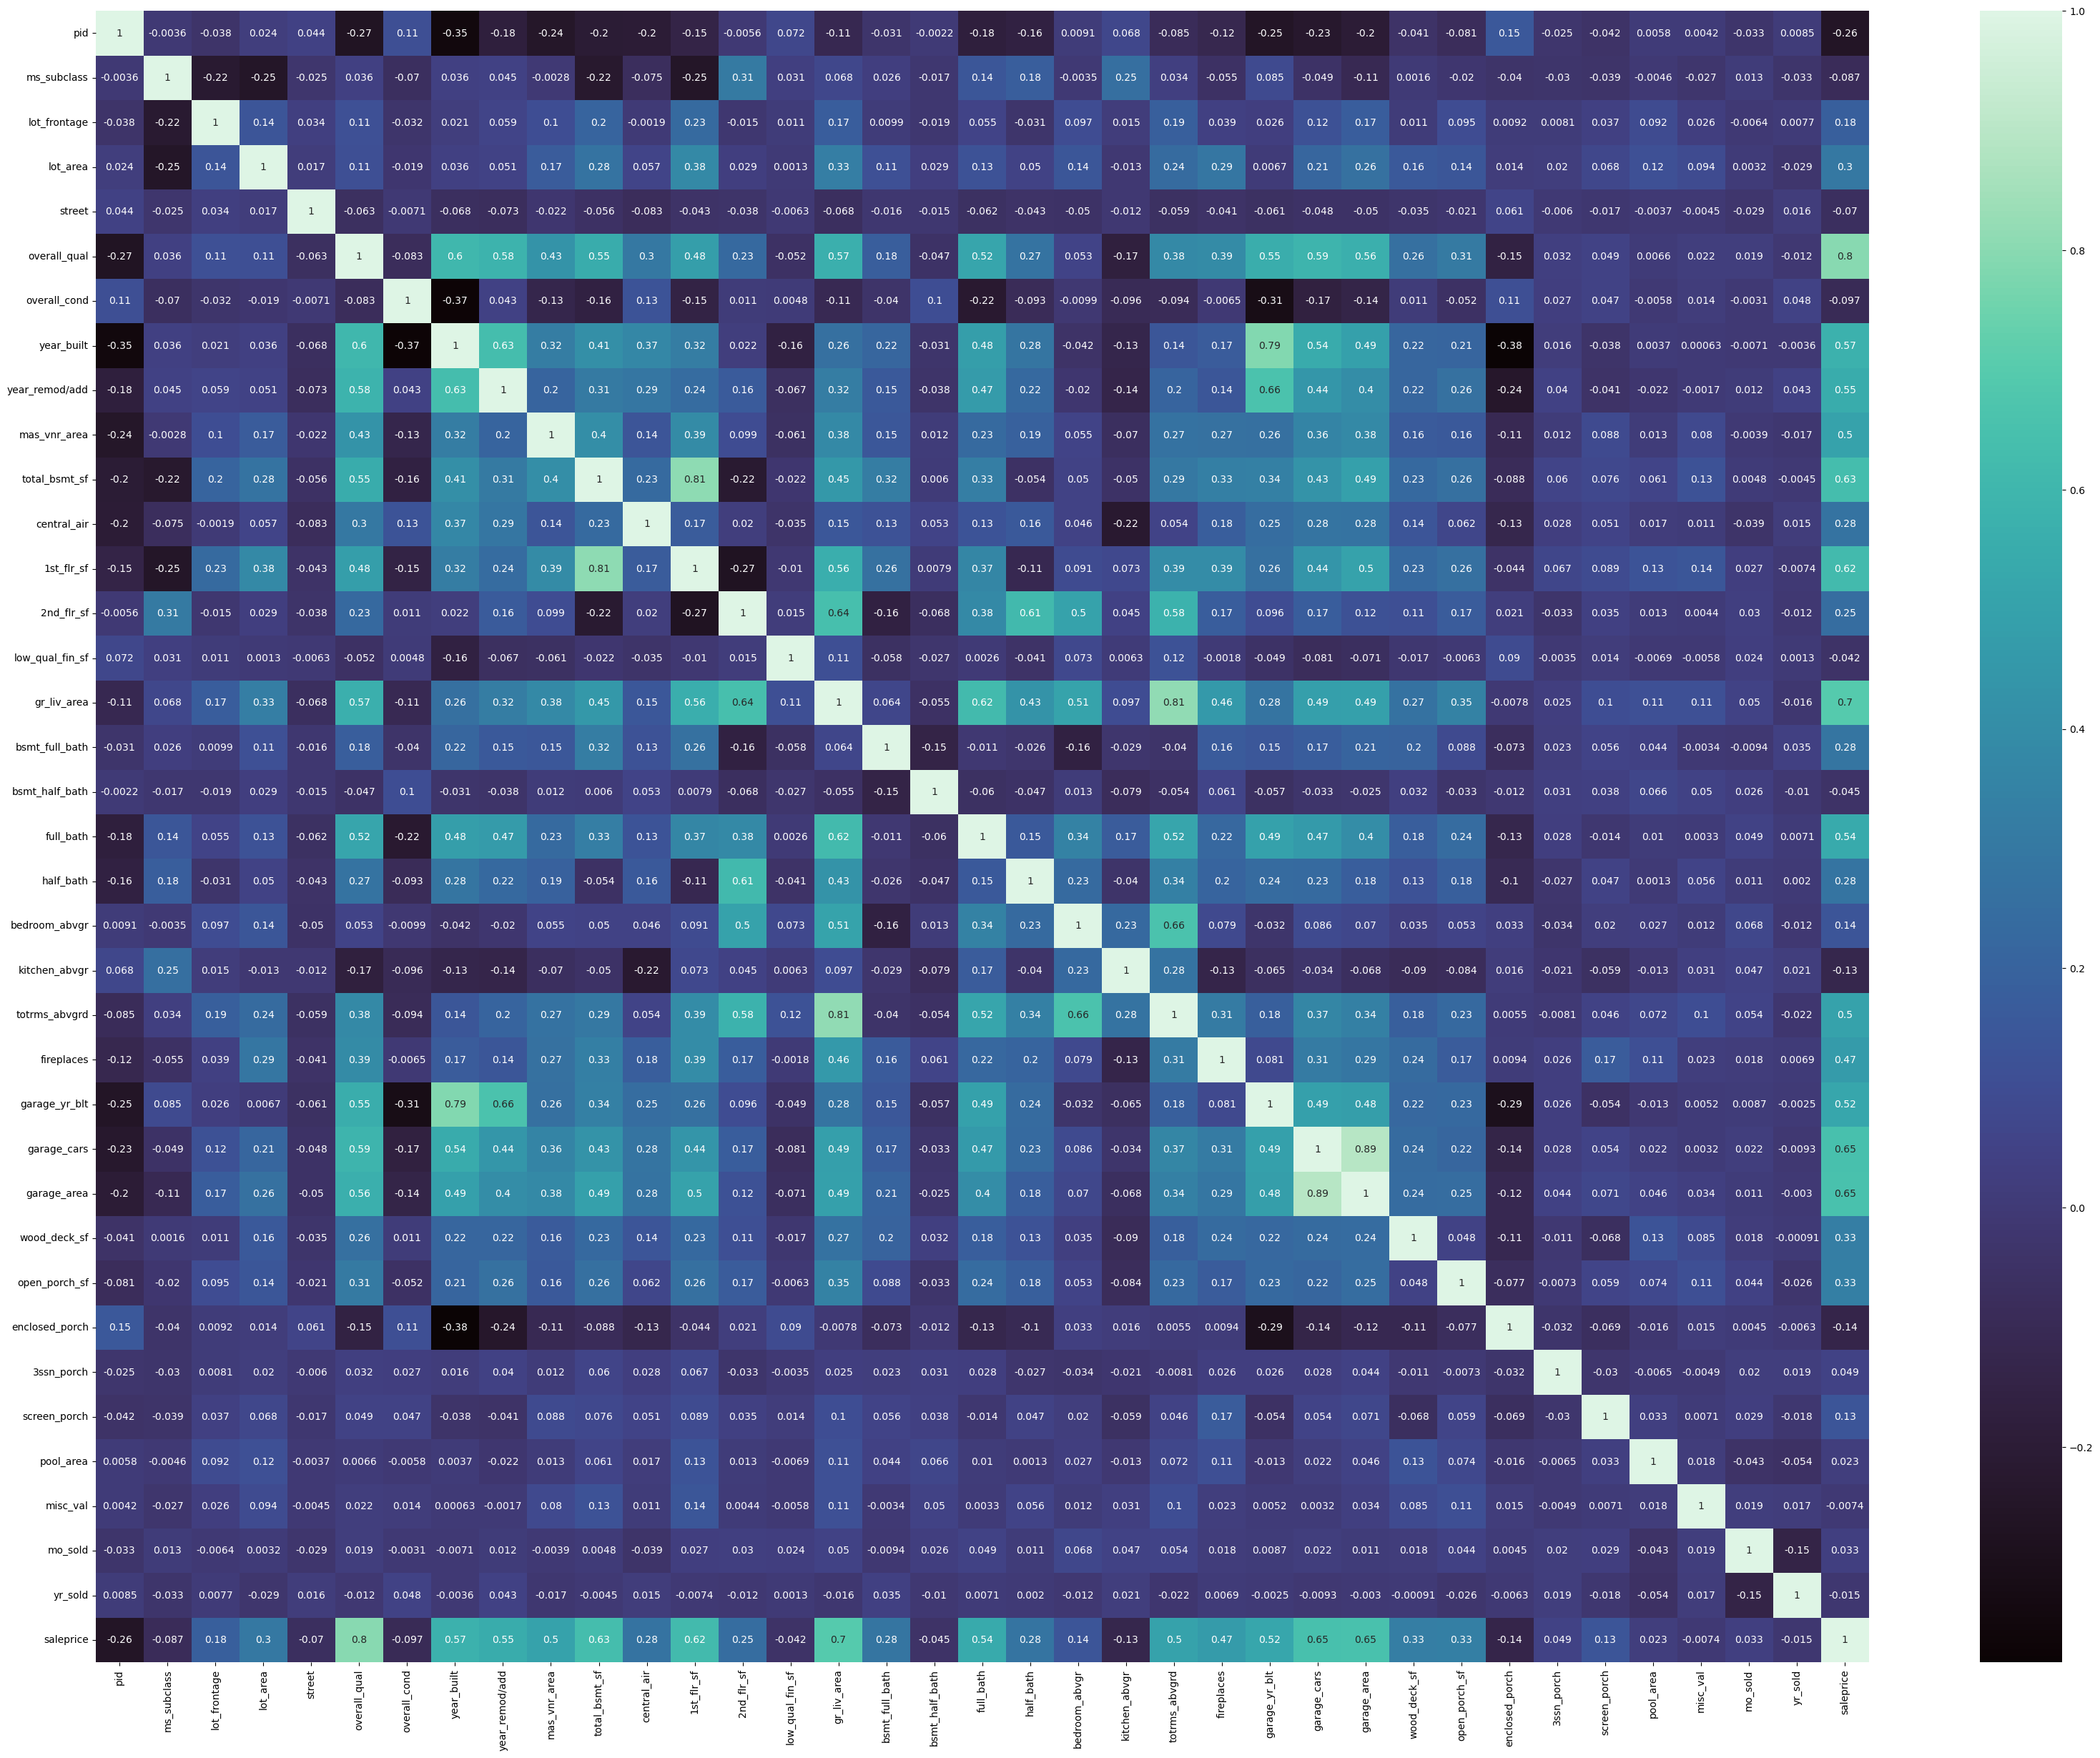

In [67]:
plt.figure(figsize=(40,30))
sns.heatmap(train_noid.corr(), cmap = 'mako', annot=True);

In [68]:
train_object = train_clean.select_dtypes(include = ['object'])
train_object.columns.to_list
#these will most likely be saw or thought of in a inital house viewing

<bound method IndexOpsMixin.tolist of Index(['ms_zoning', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'heating', 'heating_qc', 'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu', 'garage_type', 'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence',
       'misc_feature', 'sale_type'],
      dtype='object')>

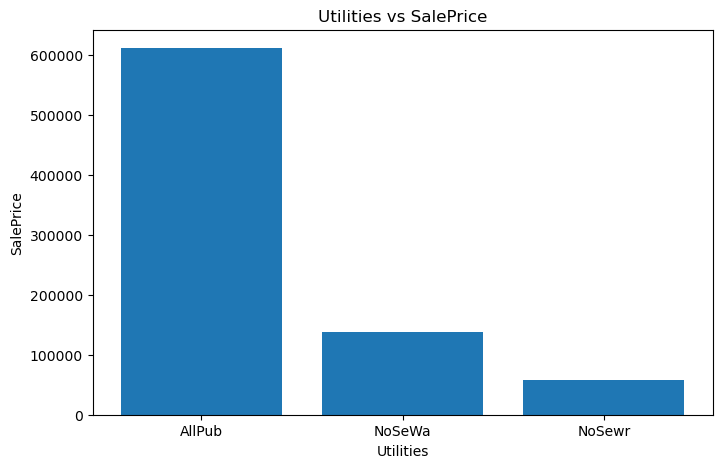

In [69]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['utilities'], train_clean['saleprice'])
plt.title('Utilities vs SalePrice')
plt.xlabel('Utilities')
plt.ylabel('SalePrice');

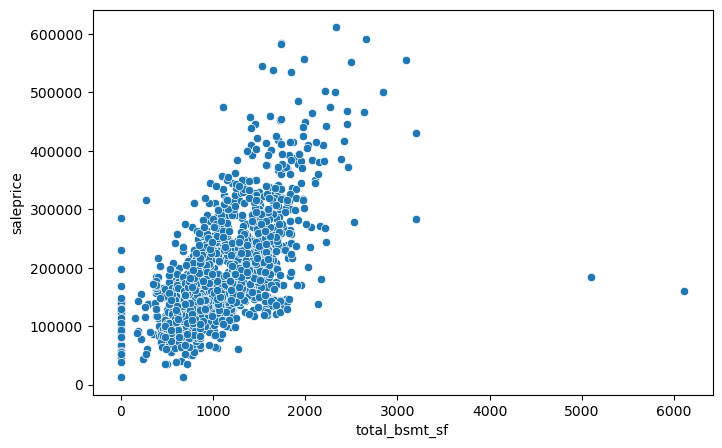

In [70]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_clean['total_bsmt_sf'], y = train_clean['saleprice']);
# Outliers but will leave, 0 values will need to rid

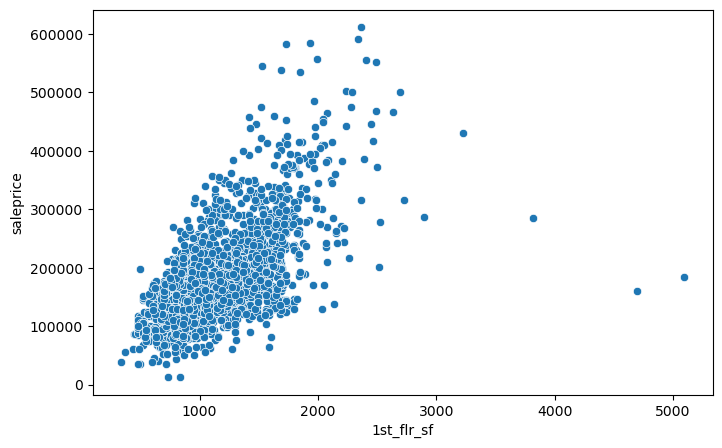

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_clean['1st_flr_sf'], y = train_clean['saleprice']);
# Outliers in this column but will leave

Text(0.5, 1.0, 'Above Ground Area to Sale Price')

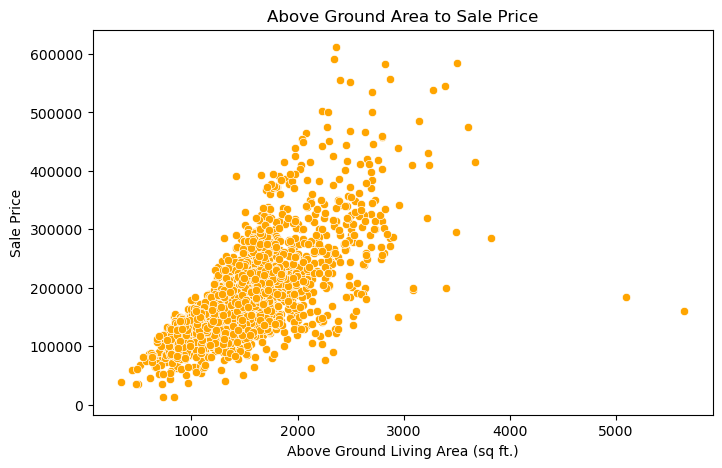

In [72]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_clean['gr_liv_area'], y = train_clean['saleprice'], color = 'orange');
plt.xlabel('Above Ground Living Area (sq ft.)')
plt.ylabel('Sale Price')
plt.title('Above Ground Area to Sale Price')
# Outliers in this column but will leave

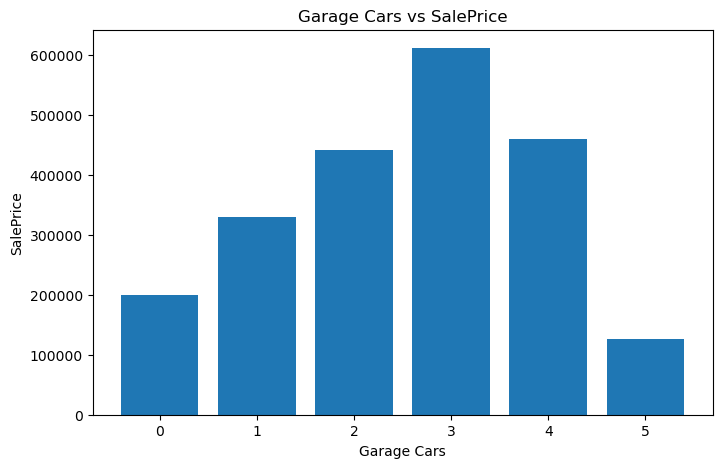

In [73]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['garage_cars'], train_clean['saleprice'])
plt.title('Garage Cars vs SalePrice')
plt.xlabel('Garage Cars')
plt.ylabel('SalePrice');

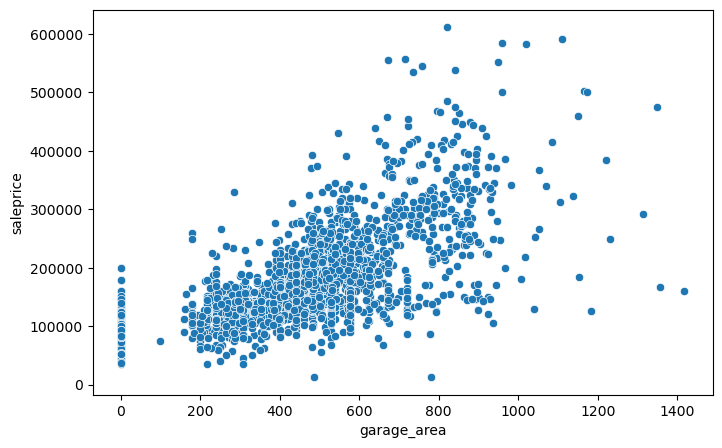

In [74]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_clean['garage_area'], y = train_clean['saleprice']);

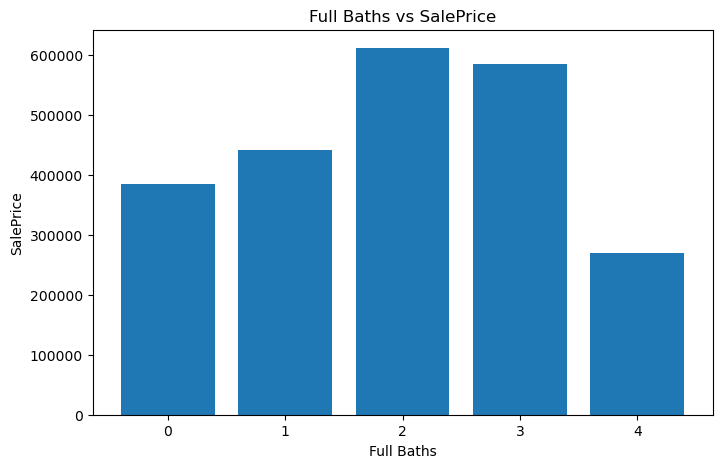

In [75]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['full_bath'], train_clean['saleprice'])
plt.title('Full Baths vs SalePrice')
plt.xlabel('Full Baths')
plt.ylabel('SalePrice');

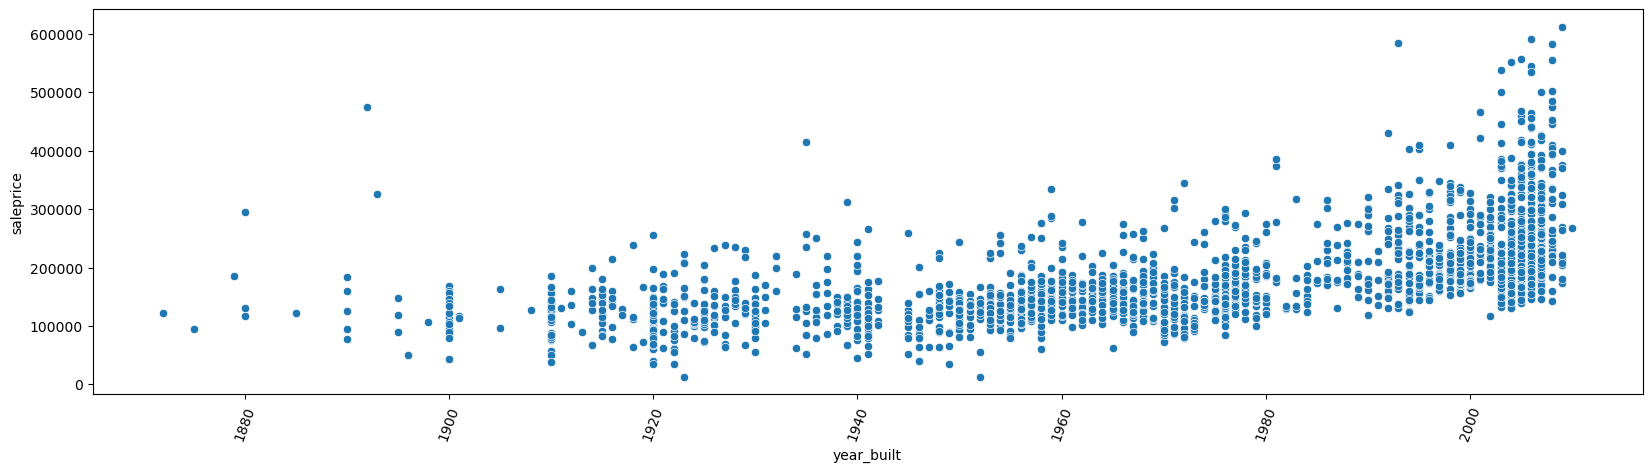

In [76]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=train_clean['year_built'], y = train_clean['saleprice'])
plt.xticks(rotation = 70);

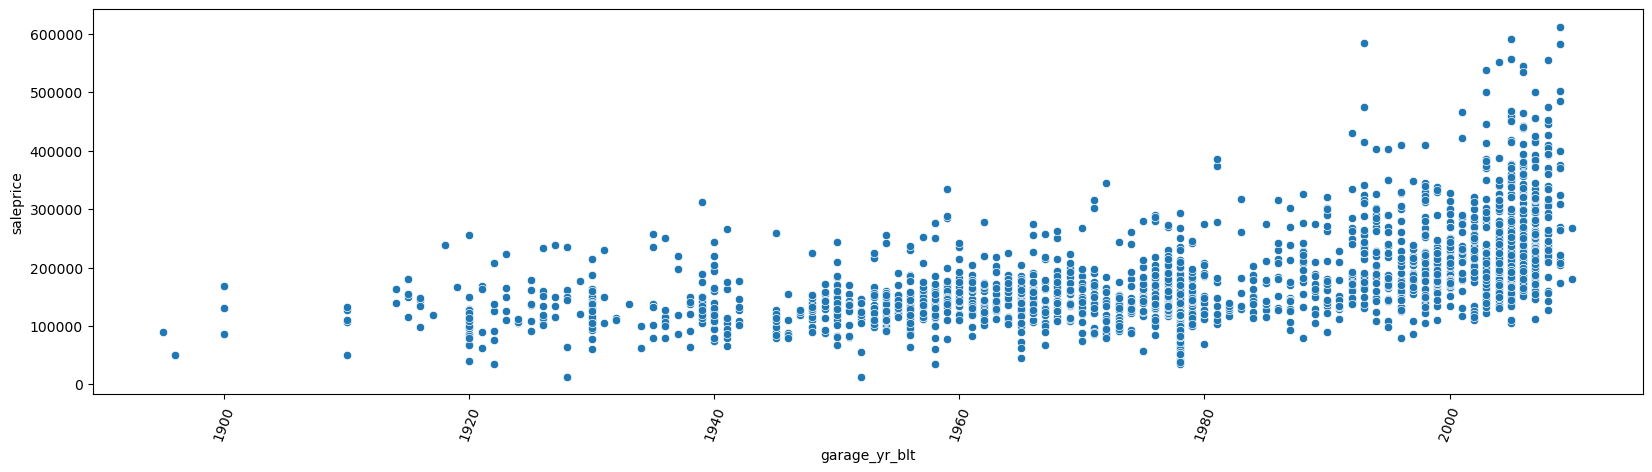

In [77]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x=train_clean['garage_yr_blt'], y = train_clean['saleprice'])
plt.xticks(rotation = 70);
# used mean in this column to fill missing

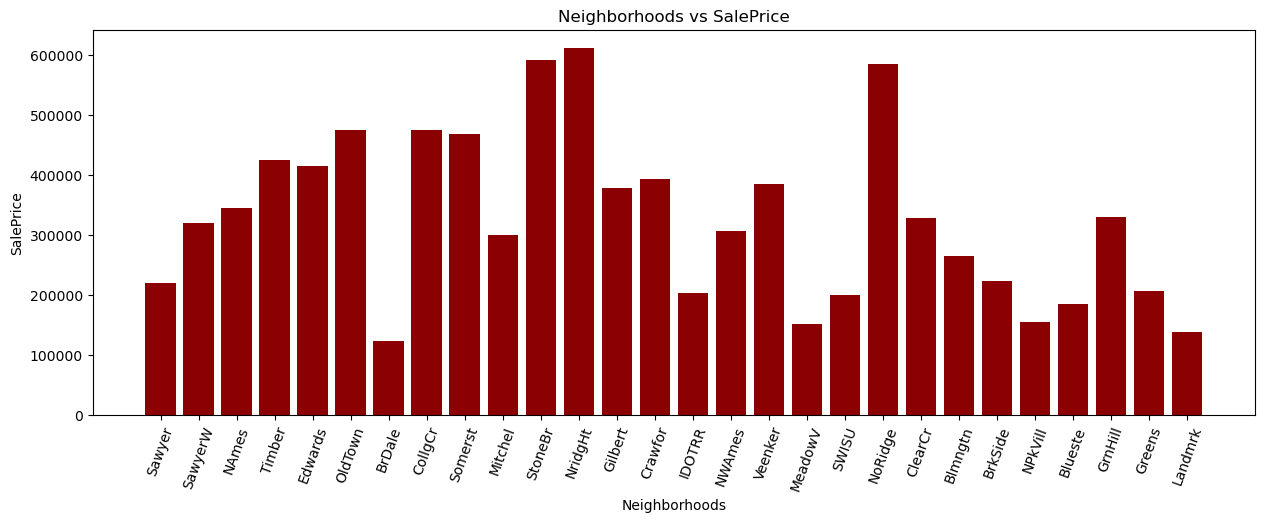

In [97]:
plt.figure(figsize = (15, 5))
plt.bar(train_clean['neighborhood'], train_clean['saleprice'], color = 'darkred')
plt.title('Neighborhoods vs SalePrice')
plt.xticks(rotation = 70)
plt.xlabel('Neighborhoods')
plt.ylabel('SalePrice');

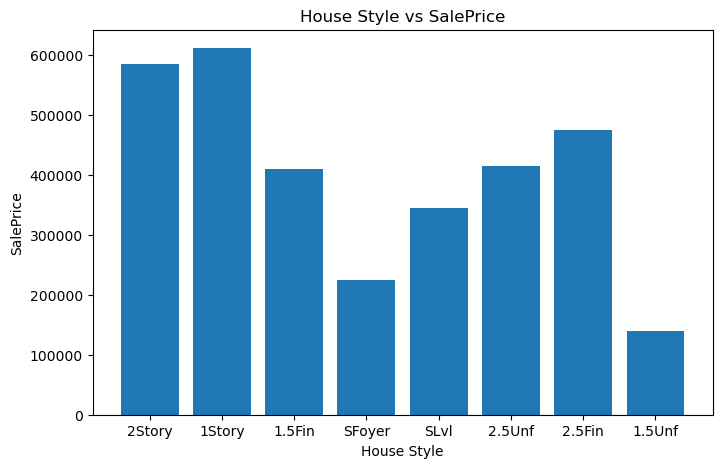

In [79]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['house_style'], train_clean['saleprice'])
plt.title('House Style vs SalePrice')
plt.xlabel('House Style')
plt.ylabel('SalePrice');

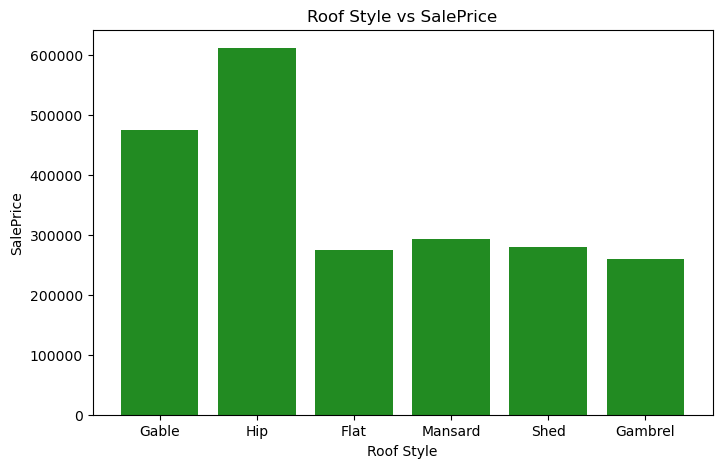

In [101]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['roof_style'], train_clean['saleprice'], color ='forestgreen')
plt.title('Roof Style vs SalePrice')
plt.xlabel('Roof Style')
plt.ylabel('SalePrice');

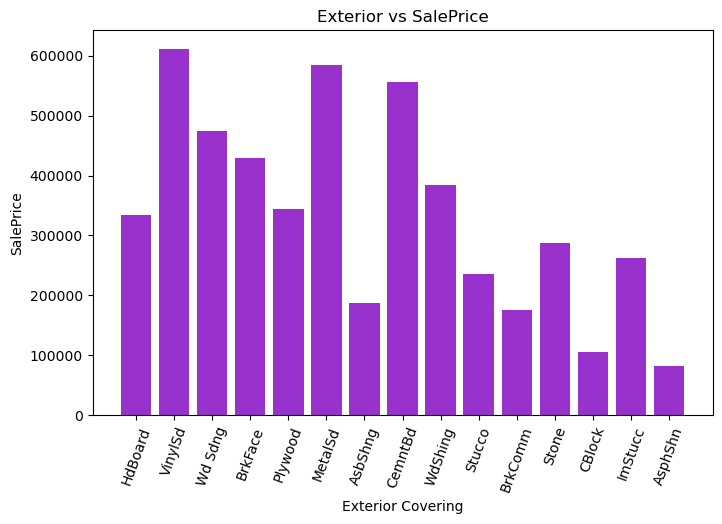

In [102]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['exterior_1st'], train_clean['saleprice'], color = 'darkorchid')
plt.title('Exterior vs SalePrice')
plt.xlabel('Exterior Covering')
plt.xticks(rotation = 70)
plt.ylabel('SalePrice');

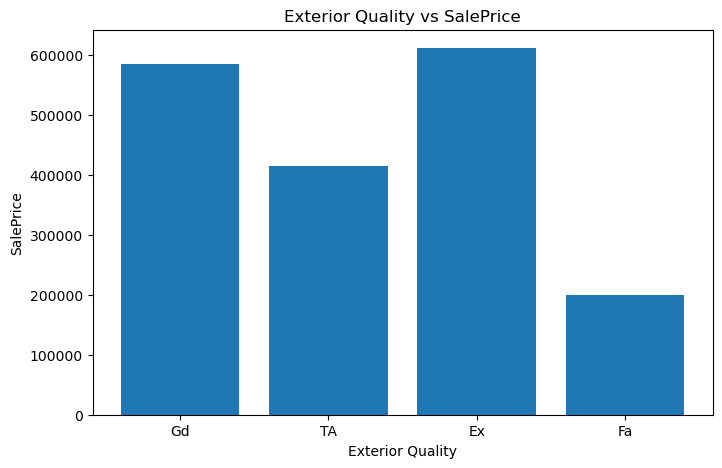

In [82]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['exter_qual'], train_clean['saleprice'])
plt.title('Exterior Quality vs SalePrice')
plt.xlabel('Exterior Quality')
plt.ylabel('SalePrice');

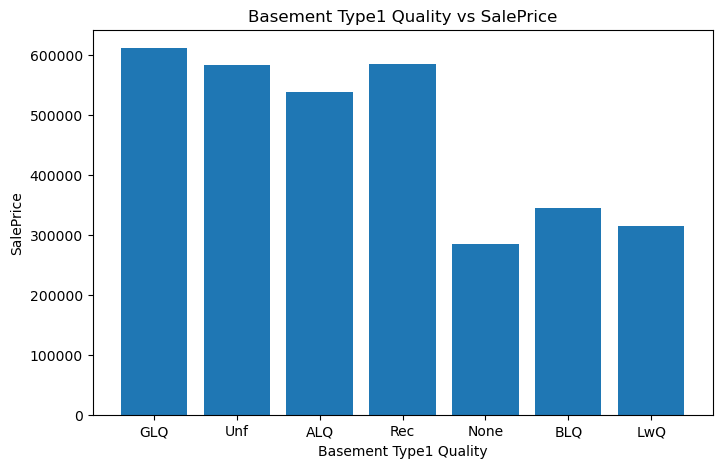

In [83]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['bsmtfin_type_1'], train_clean['saleprice'])
plt.title('Basement Type1 Quality vs SalePrice')
plt.xlabel('Basement Type1 Quality')
plt.ylabel('SalePrice');

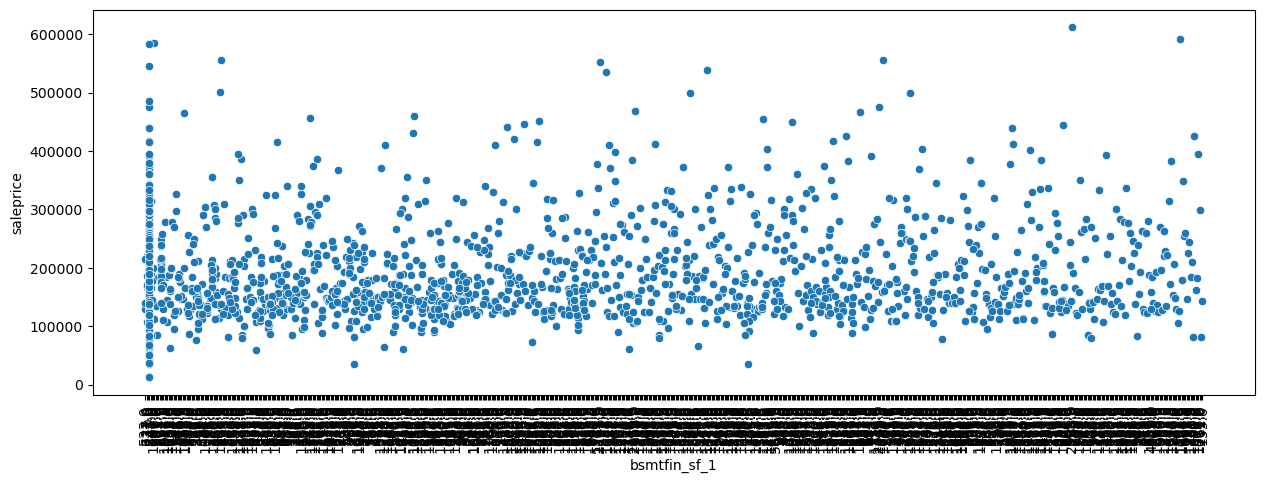

In [84]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=train_clean['bsmtfin_sf_1'], y = train_clean['saleprice'])
plt.xticks(rotation = 90);

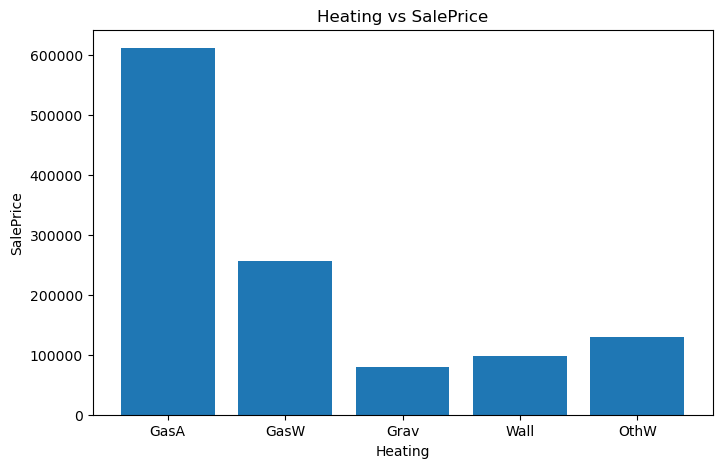

In [85]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['heating'], train_clean['saleprice'])
plt.title('Heating vs SalePrice')
plt.xlabel('Heating')
plt.ylabel('SalePrice');

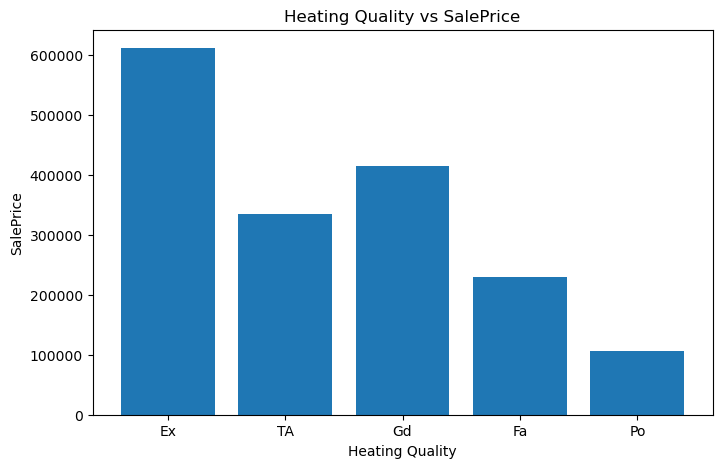

In [86]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['heating_qc'], train_clean['saleprice'])
plt.title('Heating Quality vs SalePrice')
plt.xlabel('Heating Quality')
plt.ylabel('SalePrice');

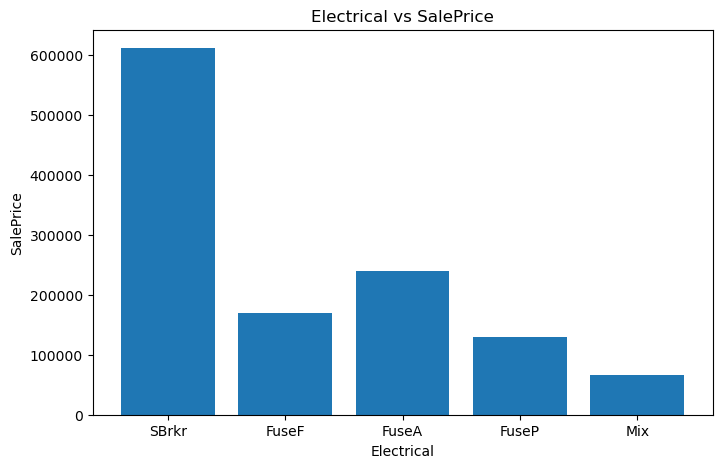

In [87]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['electrical'], train_clean['saleprice'])
plt.title('Electrical vs SalePrice')
plt.xlabel('Electrical')
plt.ylabel('SalePrice');

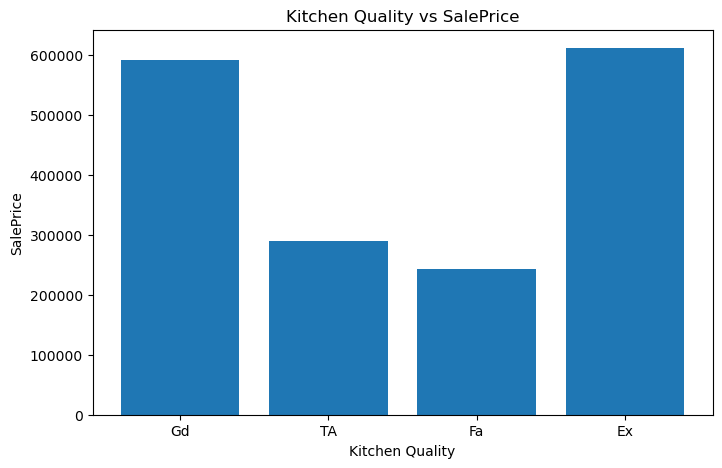

In [88]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['kitchen_qual'], train_clean['saleprice'])
plt.title('Kitchen Quality vs SalePrice')
plt.xlabel('Kitchen Quality')
plt.ylabel('SalePrice');

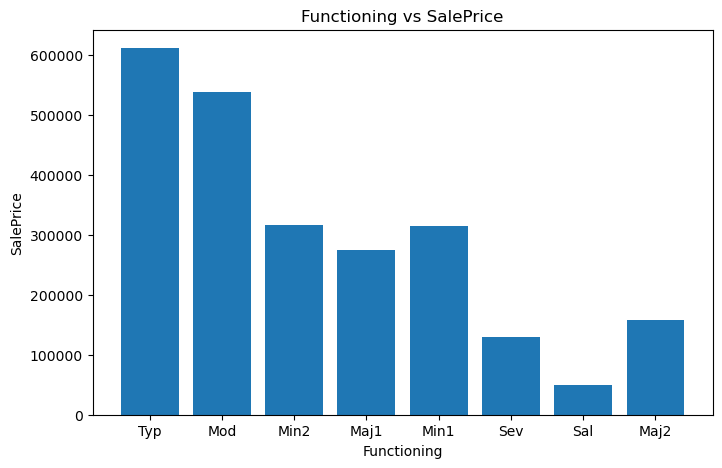

In [89]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['functional'], train_clean['saleprice'])
plt.title('Functioning vs SalePrice')
plt.xlabel('Functioning')
plt.ylabel('SalePrice');

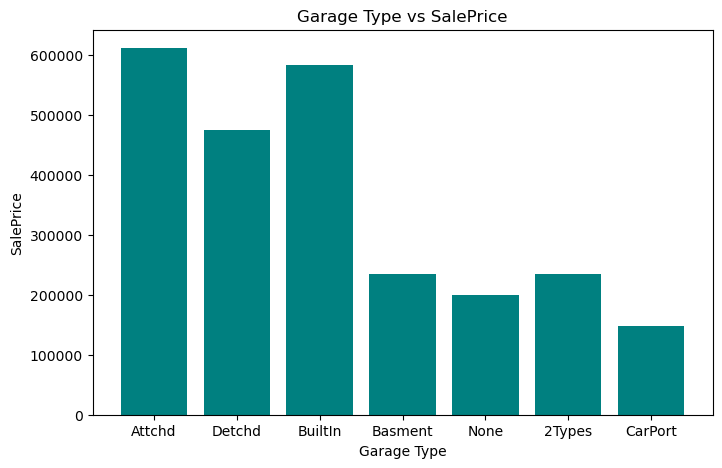

In [98]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['garage_type'], train_clean['saleprice'], color = 'teal')
plt.title('Garage Type vs SalePrice')
plt.xlabel('Garage Type')
plt.ylabel('SalePrice');

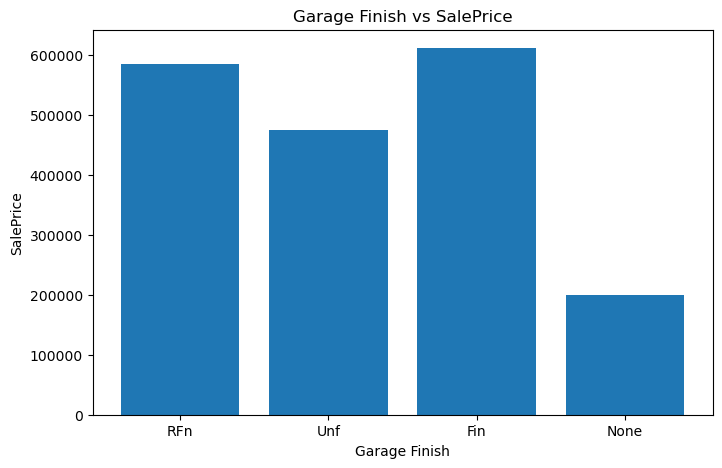

In [91]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['garage_finish'], train_clean['saleprice'])
plt.title('Garage Finish vs SalePrice')
plt.xlabel('Garage Finish')
plt.ylabel('SalePrice');

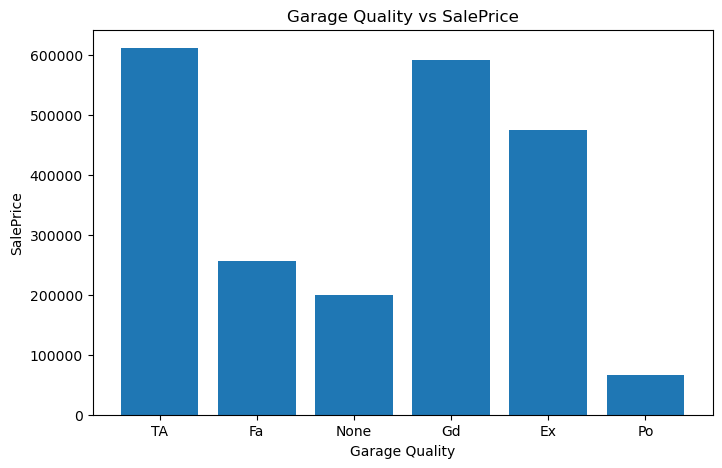

In [92]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['garage_qual'], train_clean['saleprice'])
plt.title('Garage Quality vs SalePrice')
plt.xlabel('Garage Quality')
plt.ylabel('SalePrice');

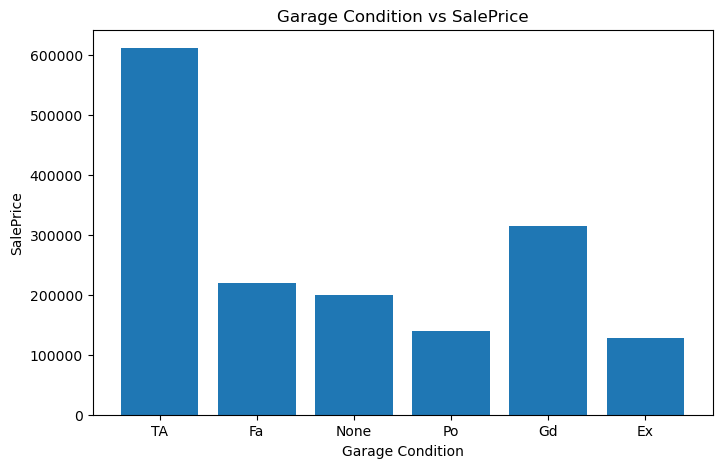

In [93]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['garage_cond'], train_clean['saleprice'])
plt.title('Garage Condition vs SalePrice')
plt.xlabel('Garage Condition')
plt.ylabel('SalePrice');

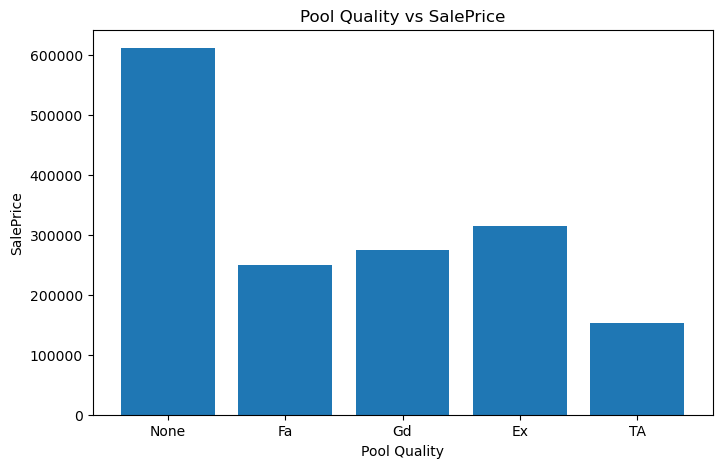

In [94]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['pool_qc'], train_clean['saleprice'])
plt.title('Pool Quality vs SalePrice')
plt.xlabel('Pool Quality')
plt.ylabel('SalePrice');

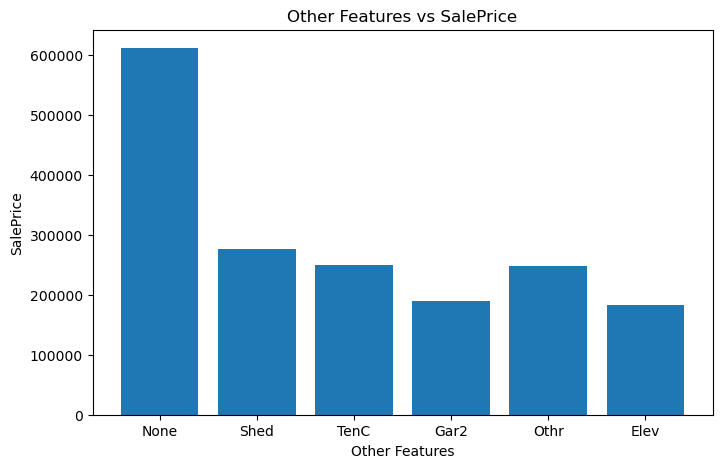

In [95]:
plt.figure(figsize = (8, 5))
plt.bar(train_clean['misc_feature'], train_clean['saleprice'])
plt.title('Other Features vs SalePrice')
plt.xlabel('Other Features')
plt.ylabel('SalePrice');